In [54]:
# import pandas for structuring the data
import pandas as pd
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
# import numpy for numerical analysis
import numpy as np

## Load data

In [164]:
def utc_to_date(timestamp):
    return pd.to_datetime(timestamp, unit = 's').date()

In [180]:
# Loading subreddits data set
wallstreetbets_df = pd.read_csv('DATA/wallstreetbets_sample_data.csv')
stocks_df = pd.read_csv('DATA/stocks_sample_data.csv')
investing_df = pd.read_csv('DATA/investing_sample_data.csv')

In [181]:
# r/wallstreetbets: Tesla mentions
org_tsla_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'TSLA' in orgs)]
org_Tesla_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'Tesla' in orgs)]
org_tesla_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'tesla' in orgs)]
wallstreetbets_df = pd.concat([org_tsla_df, org_Tesla_df, org_tesla_df], ignore_index=True)
wallstreetbets_df.rename(columns = {'created_utc':'Date'}, inplace = True)
wallstreetbets_df['Date'] = wallstreetbets_df['Date'].apply(utc_to_date)
wallstreetbets_df.head()

KeyError: 'Organizations'

In [179]:
# r/investing: Tesla mentions
org_tsla_df = investing_df[investing_df['Organizations'].apply(lambda orgs : 'TSLA' in orgs)]
org_Tesla_df = investing_df[investing_df['Organizations'].apply(lambda orgs : 'Tesla' in orgs)]
org_tesla_df = investing_df[investing_df['Organizations'].apply(lambda orgs : 'tesla' in orgs)]
investing_df = pd.concat([org_tsla_df, org_Tesla_df, org_tesla_df], ignore_index=True)
investing_df.rename(columns = {'created_utc':'Date'}, inplace = True)
investing_df['Date'] = investing_df['Date'].apply(utc_to_date)
investing_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,12325,12325,2021-05-06,NaN,investing,I agree totally. I’m not touching TSLA & never...,NaN,NaN,gx7nl55,t1_gx7nc9j,"['TSLA &', 'Puts &']"
1,31510,31510,2021-04-18,NaN,investing,Vanguard is the best way to learn about invest...,NaN,NaN,guy5qz4,t3_mt2tfk,"['SEC', 'GME', 'Finance', 'Bitcoin, TSLA, Coin..."
2,44734,44734,2021-04-09,NaN,investing,"Thank you for the feedback, I was wondering if...",NaN,NaN,gtwnptt,t1_gtvegcz,"['AMD', 'PLTR', 'TSLA/SQ']"
3,90728,90728,2021-03-09,NaN,investing,You're more bearish on it than I am.\n\nThe wa...,NaN,NaN,gqdzc9y,t1_gqdqh8z,"['HBO', 'TSLA & Nio', 'GOOG/AMZN/MSFT']"
4,92522,92522,2021-03-07,NaN,investing,I would recommend 100% VT if you are not at le...,NaN,NaN,gq3ala7,t1_gq3a6nn,"['AMZN', 'AAPL', 'MSFT', 'TSLA)](https://www.y..."


In [167]:
# stocks: Tesla mentions
org_tsla_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'TSLA' in orgs)]
org_Tesla_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'Tesla' in orgs)]
org_tesla_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'tesla' in orgs)]
stocks_df = pd.concat([org_tsla_df, org_Tesla_df, org_tesla_df], ignore_index=True)
stocks_df.rename(columns = {'created_utc':'Date'}, inplace = True)
stocks_df['Date'] = stocks_df['Date'].apply(utc_to_date)
stocks_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,12325,12325,2021-05-12,NaN,stocks,"My pleasure, glad you find the recaps helpful :)",NaN,NaN,gxwrnaa,t1_gxwr4pk,"['TSLA &', 'Puts &']"
1,31510,31510,2021-05-05,NaN,stocks,How will inflation make debt repayment easier?,NaN,NaN,gx39izo,t3_n5u1ui,"['SEC', 'GME', 'Finance', 'Bitcoin, TSLA, Coin..."
2,44734,44734,2021-05-01,NaN,stocks,"Stockholders r the chumps. YES, THERE SHOULD B...",NaN,NaN,gwl5nyy,t1_gwjgiby,"['AMD', 'PLTR', 'TSLA/SQ']"
3,7,7,2021-05-15,NaN,stocks,At least your broker is updating. Mine are sti...,NaN,NaN,gy6s57q,t3_ncrmej,['Tesla']
4,8,8,2021-05-15,NaN,stocks,For every 15 shares you had now you have 1 and...,NaN,NaN,gy6ts1p,t3_ncrmej,['Tesla']


In [168]:
# Loading tsla stock prices
tsla_prices_df = pd.read_csv('DATA/TSLA.csv')
print(tsla_prices_df.isnull().sum())

Unnamed: 0    0
Adj Close     3
dtype: int64


In [169]:
# Delete rows with NaN values
tsla_prices_df = tsla_prices_df.dropna()
tsla_prices_df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
tsla_prices_df['Date'] = pd.to_datetime(tsla_prices_df['Date'])
tsla_prices_df.head(3)

,Date,Adj Close
3,2021-01-04,729.770020
4,2021-01-05,735.109985
5,2021-01-06,755.979980


## Combining mentions and prices

### r/investing

In [ ]:
investing_mentions = investing_df[['Date', 'Organizations']]
investing_mentions

In [ ]:
# Counting mentions per date
investing_mentions = investing_mentions['Date'].value_counts().to_frame().reset_index()
investing_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
investing_mentions.rename(columns = {'index':'Date'}, inplace = True)
investing_mentions['Date'] = pd.to_datetime(investing_mentions['Date'])
investing_mentions

In [128]:
# Adding prices
investing_mentions = pd.merge(investing_mentions, tsla_prices_df, how='outer', on='Date')
investing_mentions = investing_mentions.sort_values(by='Date',ascending=True)
investing_mentions = investing_mentions.reset_index(drop=True)
investing_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
investing_mentions = investing_mentions.dropna()
investing_mentions

,Date,Mentions,Price,Price
54,2021-02-27,5.0,675.500000,675.500000
55,2021-02-28,14.0,675.500000,675.500000
56,2021-03-01,5.0,718.429993,718.429993
57,2021-03-02,5.0,686.440002,686.440002
58,2021-03-03,2.0,653.200012,653.200012
...,...,...,...,...
124,2021-05-08,7.0,672.369995,672.369995
125,2021-05-09,6.0,672.369995,672.369995
126,2021-05-10,9.0,629.039978,629.039978
127,2021-05-11,5.0,617.200012,617.200012


### r/wallstreetbets

In [129]:
wsb_mentions = wallstreetbets_df[['Date', 'Organizations']]
wsb_mentions

,Date,Organizations
0,2021-05-14,"['TSLA &', 'Puts &']"
1,2021-05-11,"['SEC', 'GME', 'Finance', 'Bitcoin, TSLA, Coin..."
2,2021-05-10,"['AMD', 'PLTR', 'TSLA/SQ']"
3,2021-05-12,"['HBO', 'TSLA & Nio', 'GOOG/AMZN/MSFT']"
4,2021-05-13,"['AMZN', 'AAPL', 'MSFT', 'TSLA)](https://www.y..."
...,...,...
1295,2021-05-07,['the_big_tesla_short/gxutecy/?context=3']
1296,2021-05-12,"['LINK**](https://www.reddit.com', 'n90gsv/app..."
1297,2021-05-07,['the_big_tesla_short/gxutecy/?context=3']
1298,2021-05-13,"['LINK**](https://www.reddit.com', 'n90gsv/app..."


In [130]:
# Counting mentions per date
wsb_mentions = wsb_mentions['Date'].value_counts().to_frame().reset_index()
wsb_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
wsb_mentions.rename(columns = {'index':'Date'}, inplace = True)
wsb_mentions['Date'] = pd.to_datetime(wsb_mentions['Date'])
wsb_mentions

,Date,Mentions
0,2021-05-12,302
1,2021-05-14,202
2,2021-05-13,193
3,2021-05-09,165
4,2021-05-07,122
5,2021-05-10,110
6,2021-05-08,98
7,2021-05-11,92
8,2021-05-15,9
9,2021-05-06,7


In [131]:
# Adding prices
wsb_mentions = pd.merge(wsb_mentions, tsla_prices_df, how='outer', on='Date')
wsb_mentions = wsb_mentions.sort_values(by='Date',ascending=True)
wsb_mentions = wsb_mentions.reset_index(drop=True)
wsb_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
wsb_mentions = wsb_mentions.dropna()
wsb_mentions

,Date,Mentions,Price
122,2021-05-06,7.0,663.539978
123,2021-05-07,122.0,672.369995
124,2021-05-08,98.0,672.369995
125,2021-05-09,165.0,672.369995
126,2021-05-10,110.0,629.039978
127,2021-05-11,92.0,617.200012
128,2021-05-12,302.0,617.200012


### r/stocks

In [170]:
stocks_mentions = stocks_df[['Date', 'Organizations']]
stocks_mentions

,Date,Organizations
0,2021-05-12,"['TSLA &', 'Puts &']"
1,2021-05-05,"['SEC', 'GME', 'Finance', 'Bitcoin, TSLA, Coin..."
2,2021-05-01,"['AMD', 'PLTR', 'TSLA/SQ']"
3,2021-05-15,['Tesla']
4,2021-05-15,['Tesla']
...,...,...
416,2021-05-01,['Tesla']
417,2021-04-30,['Tesla']
418,2021-04-29,['Tesla']
419,2021-05-15,['https://www.reuters.com/business/autos-trans...


In [171]:
# Counting mentions per date
stocks_mentions = stocks_mentions['Date'].value_counts().to_frame().reset_index()
stocks_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
stocks_mentions.rename(columns = {'index':'Date'}, inplace = True)
stocks_mentions['Date'] = pd.to_datetime(stocks_mentions['Date'])
stocks_mentions

,Date,Mentions
0,2021-05-11,96
1,2021-05-15,59
2,2021-05-10,48
3,2021-05-08,36
4,2021-05-13,33
5,2021-05-14,31
6,2021-05-12,19
7,2021-05-04,18
8,2021-05-05,18
9,2021-05-03,14


In [172]:
# Adding prices
stocks_mentions = pd.merge(stocks_mentions, tsla_prices_df, how='outer', on='Date')
stocks_mentions = stocks_mentions.sort_values(by='Date',ascending=True)
stocks_mentions = stocks_mentions.reset_index(drop=True)
stocks_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
stocks_mentions = stocks_mentions.dropna()
stocks_mentions = stocks_mentions.drop(122)
stocks_mentions

,Date,Mentions,Price
115,2021-04-29,1.0,677.000000
116,2021-04-30,11.0,709.440002
117,2021-05-01,14.0,709.440002
118,2021-05-02,4.0,709.440002
119,2021-05-03,14.0,684.900024
120,2021-05-04,18.0,673.599976
121,2021-05-05,18.0,670.940002
123,2021-05-07,3.0,672.369995
124,2021-05-08,36.0,672.369995
125,2021-05-09,9.0,672.369995


## Add together

In [173]:
mentions = pd.DataFrame()
im = investing_mentions[['Date', 'Mentions']]
im.columns = ['Date', 'r/investing']
wm = wsb_mentions[['Date', 'Mentions']]
wm.columns = ['Date', 'r/wallstreetbets']
mentions = pd.merge(im, wm, how='outer', on='Date')
sm = stocks_mentions[['Date', 'Mentions']]
sm.columns = ['Date', 'r/stocks']
mentions = pd.merge(mentions, sm, how='outer', on='Date') 
mentions['total_mentions'] = mentions.apply(lambda row: row['r/investing'] + row['r/wallstreetbets'] + row['r/stocks'], axis=1)
mentions

,Date,r/investing,r/wallstreetbets,r/stocks,total_mentions
0,2021-02-27,5.0,NaN,NaN,NaN
1,2021-02-28,14.0,NaN,NaN,NaN
2,2021-03-01,5.0,NaN,NaN,NaN
3,2021-03-02,5.0,NaN,NaN,NaN
4,2021-03-03,2.0,NaN,NaN,NaN
...,...,...,...,...,...
65,2021-05-09,6.0,165.0,9.0,180.0
66,2021-05-10,9.0,110.0,48.0,167.0
67,2021-05-11,5.0,92.0,96.0,193.0
68,2021-05-12,18.0,302.0,19.0,339.0


In [174]:
# Add prices
mentions = pd.merge(mentions, tsla_prices_df, how='outer', on='Date')
mentions = mentions.sort_values(by='Date',ascending=True)
mentions = mentions.reset_index(drop=True)
mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
#mentions = mentions.dropna()
mentions.tail()

,Date,r/investing,r/wallstreetbets,r/stocks,total_mentions,Price
124,2021-05-08,7.0,98.0,36.0,141.0,672.369995
125,2021-05-09,6.0,165.0,9.0,180.0,672.369995
126,2021-05-10,9.0,110.0,48.0,167.0,629.039978
127,2021-05-11,5.0,92.0,96.0,193.0,617.200012
128,2021-05-12,18.0,302.0,19.0,339.0,617.200012


## A look at the data

### r/ -- multi

In [175]:
# Correlation matrix
corrmat = mentions.corr()
corrmat

,r/investing,r/wallstreetbets,r/stocks,total_mentions,Price
r/investing,1.000000,0.579251,-0.188155,0.710914,-0.184991
r/wallstreetbets,0.579251,1.000000,-0.442803,0.915683,-0.399176
r/stocks,-0.188155,-0.442803,1.000000,-0.046567,-0.670641
total_mentions,0.710914,0.915683,-0.046567,1.000000,-0.654682
Price,-0.184991,-0.399176,-0.670641,-0.654682,1.000000


### r/investing

In [176]:
# Correlation matrix
corrmat = investing_mentions.corr()
corrmat

,Mentions,Price,Price
Mentions,1.000000,-0.184991,-0.184991
Price,-0.184991,1.000000,1.000000
Price,-0.184991,1.000000,1.000000


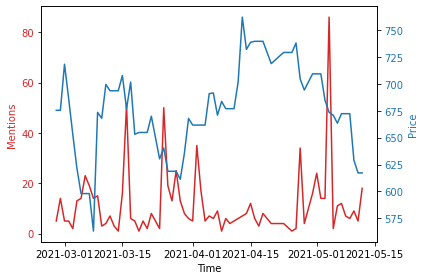

In [48]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(investing_mentions['Date'], investing_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(investing_mentions['Date'], investing_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### r/wallstreetbets

In [72]:
# Correlation matrix
corrmat = wsb_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.399176
Price,-0.399176,1.000000


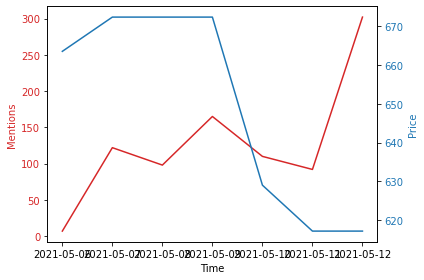

In [73]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(wsb_mentions['Date'], wsb_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(wsb_mentions['Date'], wsb_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### r/stocks

In [151]:
# Correlation matrix
corrmat = stocks_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.670641
Price,-0.670641,1.000000


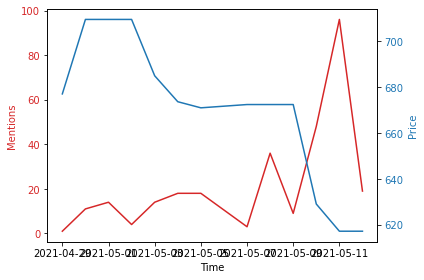

In [152]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(stocks_mentions['Date'], stocks_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(stocks_mentions['Date'], stocks_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
